In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
data=pd.read_csv("uber.csv")
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [93]:
data.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [94]:
data.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [95]:
print(data.columns)

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')


In [96]:
data.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [97]:
data.dropna(inplace=True)

In [98]:
data.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [99]:
data=data.drop(['Unnamed: 0','pickup_datetime'],axis=1)

In [100]:
data.columns

Index(['key', 'fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [101]:
data.isnull().sum()

key                  0
fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [102]:
data.shape

(199999, 7)

<Axes: ylabel='pickup_latitude'>

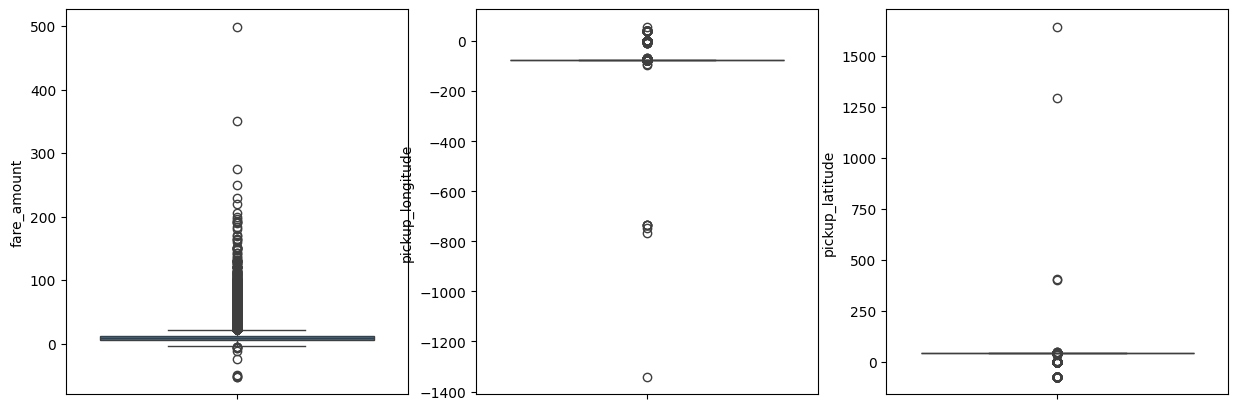

In [103]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
sns.boxplot(data=data['fare_amount'],ax=ax[0])
sns.boxplot(data=data['pickup_longitude'],ax=ax[1])
sns.boxplot(data=data['pickup_latitude'],ax=ax[2])

<Axes: ylabel='passenger_count'>

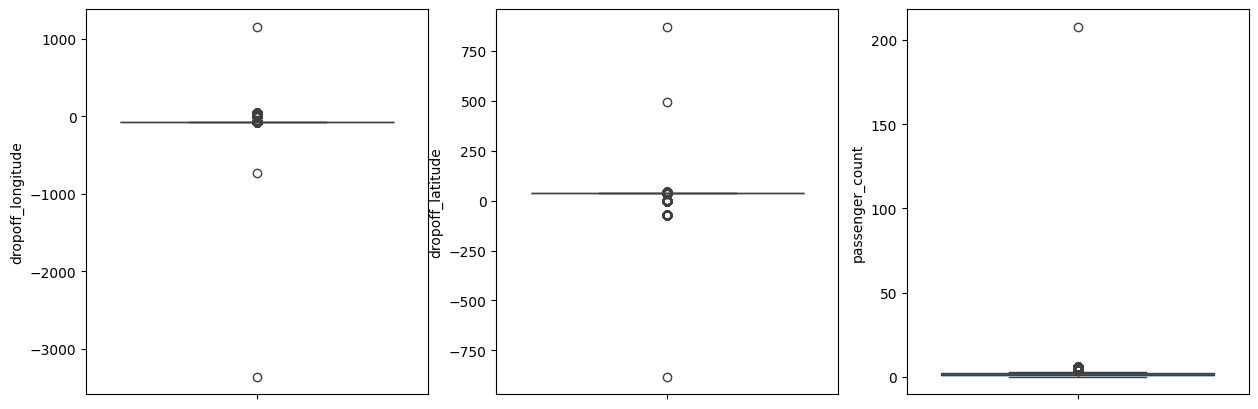

In [104]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
sns.boxplot(data=data['dropoff_longitude'],ax=ax[0])
sns.boxplot(data=data['dropoff_latitude'],ax=ax[1])
sns.boxplot(data=data['passenger_count'],ax=ax[2])

In [105]:
data.columns

Index(['key', 'fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [106]:
def remove_outliers(feature):
    global data
    q3,q1=np.percentile(data[feature],[75,25])
    iqr=q3-q1
    data=data[(data[feature]<=q3+1.5*iqr)&(data[feature]>=q1-1.5*iqr)]


In [107]:
remove_outliers('fare_amount')
remove_outliers('pickup_longitude')
remove_outliers('pickup_latitude')
remove_outliers('dropoff_longitude')
remove_outliers('dropoff_latitude')
remove_outliers('passenger_count')


<Axes: ylabel='passenger_count'>

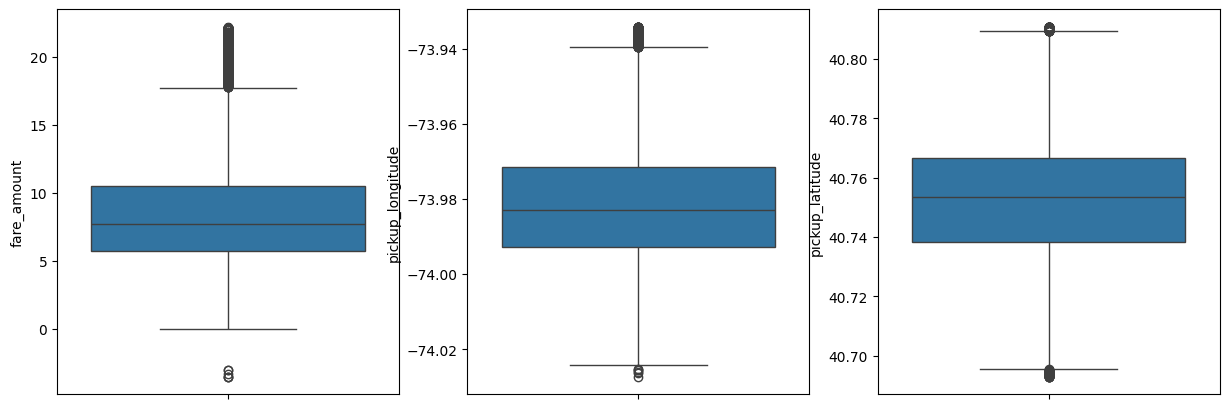

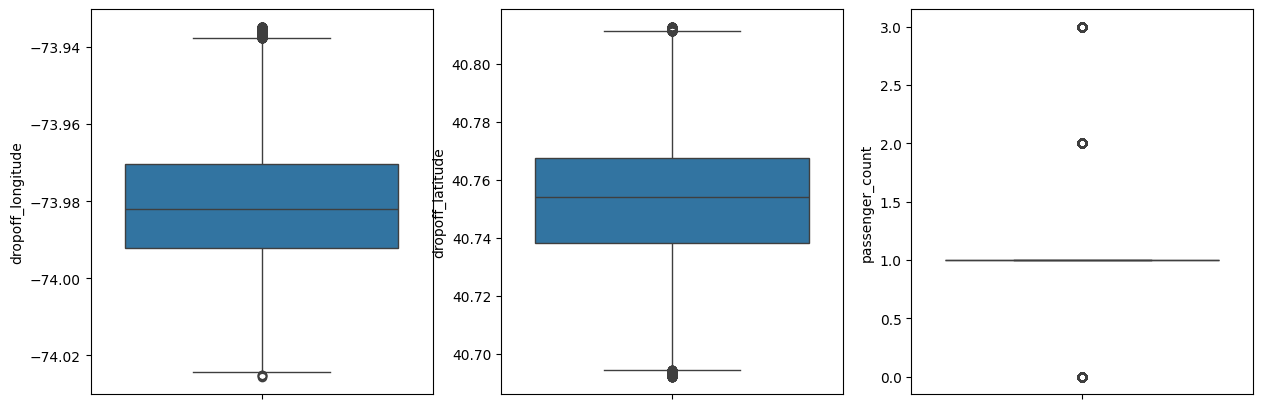

In [108]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
sns.boxplot(data=data['fare_amount'],ax=ax[0])
sns.boxplot(data=data['pickup_longitude'],ax=ax[1])
sns.boxplot(data=data['pickup_latitude'],ax=ax[2])

fig,ax=plt.subplots(1,3,figsize=(15,5))
sns.boxplot(data=data['dropoff_longitude'],ax=ax[0])
sns.boxplot(data=data['dropoff_latitude'],ax=ax[1])
sns.boxplot(data=data['passenger_count'],ax=ax[2])

In [109]:
data.head()

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-05-07 19:52:06.0000003,7.5,-73.999817,40.738354,-73.999512,40.723217,1
1,2009-07-17 20:04:56.0000002,7.7,-73.994355,40.728225,-73.994710,40.750325,1
2,2009-08-24 21:45:00.00000061,12.9,-74.005043,40.740770,-73.962565,40.772647,1
3,2009-06-26 08:22:21.0000001,5.3,-73.976124,40.790844,-73.965316,40.803349,3
5,2011-02-12 02:27:09.0000006,4.9,-73.969019,40.755910,-73.969019,40.755910,1


In [110]:
data.drop(['key'],axis=1,inplace=True)

In [111]:
cor=data.corr()

<Axes: >

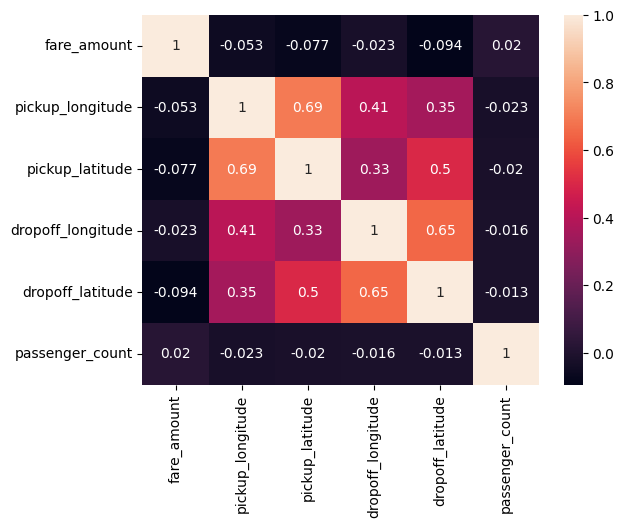

In [112]:
sns.heatmap(cor,annot=True)

In [113]:
print(cor)


                   fare_amount  pickup_longitude  pickup_latitude  \
fare_amount           1.000000         -0.052798        -0.076539   
pickup_longitude     -0.052798          1.000000         0.693656   
pickup_latitude      -0.076539          0.693656         1.000000   
dropoff_longitude    -0.023167          0.409016         0.334680   
dropoff_latitude     -0.094152          0.353741         0.499956   
passenger_count       0.019572         -0.022952        -0.019989   

                   dropoff_longitude  dropoff_latitude  passenger_count  
fare_amount                -0.023167         -0.094152         0.019572  
pickup_longitude            0.409016          0.353741        -0.022952  
pickup_latitude             0.334680          0.499956        -0.019989  
dropoff_longitude           1.000000          0.651683        -0.016413  
dropoff_latitude            0.651683          1.000000        -0.013321  
passenger_count            -0.016413         -0.013321         1.000000 

In [114]:
print(cor['fare_amount'])

fare_amount          1.000000
pickup_longitude    -0.052798
pickup_latitude     -0.076539
dropoff_longitude   -0.023167
dropoff_latitude    -0.094152
passenger_count      0.019572
Name: fare_amount, dtype: float64


In [115]:
X=data.drop(['fare_amount'],axis=1)
y=data['fare_amount']

In [116]:
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [117]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [118]:
y_pred=model.predict(X_test)

In [119]:
from sklearn.metrics import mean_squared_error,r2_score
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))

In [120]:
print(RMSE)

3.8715368852615604


In [121]:
r_s=r2_score(y_test,y_pred)
print(r_s)

0.013878076816334906
